In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ln -s /content/drive/MyDrive/'Data Analytics'/'Case Study' case_study

# Initial data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from datetime import datetime
import calendar

In [ ]:
bicycle_info = pd.read_csv('/content/case_study/2022_bicycle.csv')
#bicycle_month_info = pd.read_csv('/content/case_study/2022_bicycle_ride_info_month.csv')
#week_info = pd.read_csv('/content/case_study/2022_bicycle_ride_info_week.csv')
#scalar_info = pd.read_csv('/content/case_study/2022_bicycle_ride_info_scalar.csv')


bicycle_info = bicycle_info.astype({"ride_id": 'str', "rideable_type": 'str', "started_at": 'datetime64[ns]', "ended_at": 'datetime64[ns]',
               "start_station_name": 'str', "start_station_id": 'str', "end_station_name": 'str', "end_station_id": 'str',
               "start_lat": 'float', "start_lgn": 'float', "end_lat": 'float', "end_lgn": 'float', "member_casual": 'str' 
})

<b>General information</b>

In [ ]:
bicycle_info

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lgn,end_lat,end_lgn,member_casual
0,00000123F60251E6,classic_bike,2022-02-07 15:47:40,2022-02-07 15:49:28,Wells St & Hubbard St,TA1307000151,Kingsbury St & Kinzie St,KA1503000043,41.889906,-87.634266,41.889177,-87.638506,member
1,00000179CF2C4FB5,electric_bike,2022-07-28 09:02:27,2022-07-28 09:13:51,Ellis Ave & 55th St,KA1504000076,Ellis Ave & 55th St,KA1504000076,41.794237,-87.601343,41.794301,-87.601450,casual
2,0000038F578A7278,electric_bike,2022-12-15 15:36:06,2022-12-15 15:44:35,Lakeview Ave & Fullerton Pkwy,TA1309000019,Clark St & Elm St,TA1307000039,41.925826,-87.638823,41.902973,-87.631280,casual
3,0000047373295F85,electric_bike,2022-07-22 16:56:46,2022-07-22 17:21:58,Streeter Dr & Grand Ave,13022,Calumet Ave & 18th St,13102,41.892209,-87.611831,41.857611,-87.619407,casual
4,000004C3185FDDE9,electric_bike,2022-07-17 13:01:54,2022-07-17 13:16:13,Larrabee St & Webster Ave,13193,Honore St & Division St,TA1305000034,41.921854,-87.644023,41.903119,-87.673935,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667612,FFFFEF3A5F5B6C33,electric_bike,2022-07-09 17:57:17,2022-07-09 18:06:29,St. Louis Ave & Fullerton Ave,KA1504000090,Kosciuszko Park,15643,41.924788,-87.714531,41.930585,-87.723777,casual
5667613,FFFFF0DD775F52EE,classic_bike,2022-07-10 11:30:20,2022-07-10 11:30:37,Clinton St & Lake St,13021,Clinton St & Lake St,13021,41.885637,-87.641823,41.885637,-87.641823,member
5667614,FFFFF67EEACE39D3,electric_bike,2022-08-21 13:56:45,2022-08-21 15:49:12,Public Rack - Sacramento Ave & Devon Ave,485,Public Rack - Sacramento Ave & Devon Ave,485,42.000000,-87.700000,42.000000,-87.700000,casual
5667615,FFFFFC95C74086C1,docked_bike,2022-06-27 16:00:47,2022-06-27 16:12:44,Streeter Dr & Grand Ave,13022,DuSable Lake Shore Dr & Monroe St,13300,41.892278,-87.612043,41.880958,-87.616743,casual


In [11]:
main_df = bicycle_info
main_df = main_df.loc[:, ['started_at', 'ended_at', 'member_casual']]

# Calculating the ride duration time (minutes)
main_df['started_at_sec'] = main_df['started_at'].apply(lambda x: datetime.timestamp(x))
main_df['ended_at_sec'] = main_df['ended_at'].apply(lambda x: datetime.timestamp(x))
main_df['ride_duration'] = (main_df['ended_at_sec'] - main_df['started_at_sec']) / 60

In [12]:
main_df

,started_at,ended_at,member_casual,started_at_sec,ended_at_sec,ride_duration
0,2022-02-07 15:47:40,2022-02-07 15:49:28,member,1.644249e+09,1.644249e+09,1.800000
1,2022-07-28 09:02:27,2022-07-28 09:13:51,casual,1.658999e+09,1.659000e+09,11.400000
2,2022-12-15 15:36:06,2022-12-15 15:44:35,casual,1.671119e+09,1.671119e+09,8.483333
3,2022-07-22 16:56:46,2022-07-22 17:21:58,casual,1.658509e+09,1.658511e+09,25.200000
4,2022-07-17 13:01:54,2022-07-17 13:16:13,casual,1.658063e+09,1.658064e+09,14.316667
...,...,...,...,...,...,...
5667612,2022-07-09 17:57:17,2022-07-09 18:06:29,casual,1.657389e+09,1.657390e+09,9.200000
5667613,2022-07-10 11:30:20,2022-07-10 11:30:37,member,1.657453e+09,1.657453e+09,0.283333
5667614,2022-08-21 13:56:45,2022-08-21 15:49:12,casual,1.661090e+09,1.661097e+09,112.450000
5667615,2022-06-27 16:00:47,2022-06-27 16:12:44,casual,1.656346e+09,1.656346e+09,11.950000


# Removing data outliers

<b> Interquartile range method</b>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f168bf77250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f168bf77910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1690d81eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f168bf77fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f168bf84310>],
 'means': []}

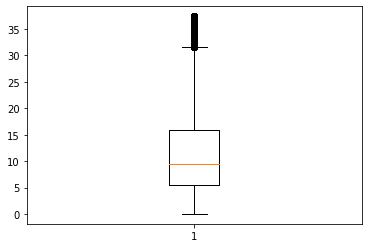

In [13]:
IQR_df = main_df

Q1 = IQR_df['ride_duration'].quantile(0.25)
Q3 = IQR_df['ride_duration'].quantile(0.75)

IQR = Q3 - Q1

IQR_df = IQR_df[~((IQR_df['ride_duration'] < (Q1 - 1.5 * IQR)) | (IQR_df['ride_duration'] > (Q3 + 1.5 * IQR)))]


stat = mpl.cbook.boxplot_stats(IQR_df['ride_duration'])
#print(stat)

plt.boxplot(IQR_df['ride_duration'])

In [14]:
IQR_df

,started_at,ended_at,member_casual,started_at_sec,ended_at_sec,ride_duration
0,2022-02-07 15:47:40,2022-02-07 15:49:28,member,1.644249e+09,1.644249e+09,1.800000
1,2022-07-28 09:02:27,2022-07-28 09:13:51,casual,1.658999e+09,1.659000e+09,11.400000
2,2022-12-15 15:36:06,2022-12-15 15:44:35,casual,1.671119e+09,1.671119e+09,8.483333
3,2022-07-22 16:56:46,2022-07-22 17:21:58,casual,1.658509e+09,1.658511e+09,25.200000
4,2022-07-17 13:01:54,2022-07-17 13:16:13,casual,1.658063e+09,1.658064e+09,14.316667
...,...,...,...,...,...,...
5667611,2022-09-17 14:09:29,2022-09-17 14:19:05,casual,1.663424e+09,1.663424e+09,9.600000
5667612,2022-07-09 17:57:17,2022-07-09 18:06:29,casual,1.657389e+09,1.657390e+09,9.200000
5667613,2022-07-10 11:30:20,2022-07-10 11:30:37,member,1.657453e+09,1.657453e+09,0.283333
5667615,2022-06-27 16:00:47,2022-06-27 16:12:44,casual,1.656346e+09,1.656346e+09,11.950000


# Month central tendencies

In [15]:
month_info = pd.DataFrame(columns = ['month', 'total_rides', 'casuals_rides', 'members_rides'])
month_info = month_info.astype({"month": 'str', "total_rides": 'int', "casuals_rides": 'int', "members_rides": 'int'})

# Rides per month
for i in range(12):
  month_info.loc[i] = [
    calendar.month_name[i+1],
    len(IQR_df.loc[IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1]]),
    len(IQR_df.loc[(IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_df['member_casual'] == 'casual')]),
    len(IQR_df.loc[(IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_df['member_casual'] == 'member')])
  ]

In [16]:
month_info

,month,total_rides,casuals_rides,members_rides
0,January,100500,17275,83225
1,February,111298,19426,91872
2,March,264468,75956,188512
3,April,346155,108018,238137
4,May,572271,232079,340192
5,June,699576,315380,384196
6,July,746597,345923,400674
7,August,724073,312645,411428
8,September,654497,263159,391338
9,October,528069,187739,340330


In [17]:
month_info_duration = pd.DataFrame(
  columns = ['month', 'total_rides_duration_mean', 'casuals_rides_duration_mean', 'members_rides_duration_mean', 
             'total_rides_duration_std', 'casuals_rides_duration_std', 'members_rides_duration_std', 
             'total_rides_duration_mode', 'casuals_rides_duration_mode', 'members_rides_duration_mode',
             'total_rides_duration_median', 'casuals_rides_duration_median', 'members_rides_duration_median'])

# Converting column's data types to float and month column to string
month_info_duration = month_info_duration.astype('float')
month_info_duration = month_info_duration.astype({"month": 'str'})


## Rides mean, standard deviation, mode and median
for i in range(12):
  month_info_duration.loc[i] = [
    calendar.month_name[i+1],

    IQR_df.loc[IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1], 'ride_duration'].mean(),
    IQR_df.loc[(IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_df['member_casual'] == 'casual'), 'ride_duration'].mean(),
    IQR_df.loc[(IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_df['member_casual'] == 'member'), 'ride_duration'].mean(),

    IQR_df.loc[IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1], 'ride_duration'].std(),
    IQR_df.loc[(IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_df['member_casual'] == 'casual'), 'ride_duration'].std(),
    IQR_df.loc[(IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_df['member_casual'] == 'member'), 'ride_duration'].std(),

    IQR_df.loc[IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1], 'ride_duration'].mode()[0],
    IQR_df.loc[(IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_df['member_casual'] == 'casual'), 'ride_duration'].mode()[0],
    IQR_df.loc[(IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_df['member_casual'] == 'member'), 'ride_duration'].mode()[0],

    IQR_df.loc[IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1], 'ride_duration'].median(),
    IQR_df.loc[(IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_df['member_casual'] == 'casual'), 'ride_duration'].median(),
    IQR_df.loc[(IQR_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_df['member_casual'] == 'member'), 'ride_duration'].median()
  ]

In [18]:
month_info_duration

,month,total_rides_duration_mean,casuals_rides_duration_mean,members_rides_duration_mean,total_rides_duration_std,casuals_rides_duration_std,members_rides_duration_std,total_rides_duration_mode,casuals_rides_duration_mode,members_rides_duration_mode,total_rides_duration_median,casuals_rides_duration_median,members_rides_duration_median
0,January,9.785336,11.633932,9.401624,7.140822,7.825947,6.928711,4.383333,0.166667,4.333333,7.650000,9.416667,7.333333
1,February,9.930336,12.160039,9.458874,7.348845,8.108175,7.088792,0.033333,0.033333,0.033333,7.750000,9.933333,7.350000
2,March,11.202945,14.043105,10.058576,8.148241,8.929881,7.513709,4.316667,7.150000,4.316667,8.783333,11.900000,7.800000
3,April,11.135269,13.848208,9.904691,8.128009,8.830080,7.470715,0.033333,0.033333,4.300000,8.783333,11.750000,7.666667
4,May,12.536014,14.471654,11.215520,8.546869,8.909268,8.027068,5.166667,9.583333,4.383333,10.366667,12.616667,9.000000
5,June,12.805867,14.122630,11.724959,8.420100,8.678023,8.042793,7.133333,8.416667,5.383333,10.800000,12.316667,9.633333
6,July,12.641082,13.851932,11.595692,8.431937,8.710901,8.038055,5.983333,7.900000,5.400000,10.583333,11.950000,9.516667
7,August,12.168410,13.301868,11.307094,8.211354,8.536173,7.846946,6.633333,8.066667,6.633333,10.116667,11.316667,9.250000
8,September,11.629587,12.752000,10.874810,8.018052,8.351023,7.694627,4.333333,7.633333,4.716667,9.550000,10.716667,8.800000
9,October,10.659957,11.892847,9.979848,7.696731,8.181903,7.327282,4.433333,6.033333,3.900000,8.500000,9.700000,7.883333


In [ ]:
data = pd.merge(month_info, month_info_duration, how = 'inner', on = 'month')

data


try:
    data.to_csv('/content/case_study/2022_bicycle_month_info.csv', mode = 'x', index = False, float_format = '%.6f')
except FileExistsError:
    print('Error. File already exists')

# Week central tendencies

In [19]:
week_info = pd.DataFrame(columns = ['day', 'total_rides', 'casuals_rides', 'members_rides'])
week_info = week_info.astype({"day": 'str', "total_rides": 'int', "casuals_rides": 'int', "members_rides": 'int'})

# Rides per week's day
for i in range(7):
  week_info.loc[i] = [
    calendar.day_name[i],
    len(IQR_df.loc[IQR_df['started_at'].dt.day_name() == calendar.day_name[i]]),
    len(IQR_df.loc[(IQR_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_df['member_casual'] == 'casual')]),
    len(IQR_df.loc[(IQR_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_df['member_casual'] == 'member')])
  ]

In [20]:
week_info

,day,total_rides,casuals_rides,members_rides
0,Monday,697251,238229,459022
1,Tuesday,740550,235500,505050
2,Wednesday,757041,247157,509884
3,Thursday,794243,276815,517428
4,Friday,748789,295946,452843
5,Saturday,819604,396541,423063
6,Sunday,693092,324038,369054


In [21]:
week_info_duration = pd.DataFrame(
  columns = ['day', 'total_rides_duration_mean', 'casuals_rides_duration_mean', 'members_rides_duration_mean', 
             'total_rides_duration_std', 'casuals_rides_duration_std', 'members_rides_duration_std', 
             'total_rides_duration_mode', 'casuals_rides_duration_mode', 'members_rides_duration_mode',
             'total_rides_duration_median', 'casuals_rides_duration_median', 'members_rides_duration_median'])

# Converting column's data types to float and month column to string
week_info_duration = week_info_duration.astype('float')
week_info_duration = week_info_duration.astype({"day": 'str'})


## Rides mean, standard deviation, mode and median
for i in range(7):
  week_info_duration.loc[i] = [
    calendar.day_name[i],

    IQR_df.loc[IQR_df['started_at'].dt.day_name() == calendar.day_name[i], 'ride_duration'].mean(),
    IQR_df.loc[(IQR_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_df['member_casual'] == 'casual'), 'ride_duration'].mean(),
    IQR_df.loc[(IQR_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_df['member_casual'] == 'member'), 'ride_duration'].mean(),

    IQR_df.loc[IQR_df['started_at'].dt.day_name() == calendar.day_name[i], 'ride_duration'].std(),
    IQR_df.loc[(IQR_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_df['member_casual'] == 'casual'), 'ride_duration'].std(),
    IQR_df.loc[(IQR_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_df['member_casual'] == 'member'), 'ride_duration'].std(),

    IQR_df.loc[IQR_df['started_at'].dt.day_name() == calendar.day_name[i], 'ride_duration'].mode()[0],
    IQR_df.loc[(IQR_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_df['member_casual'] == 'casual'), 'ride_duration'].mode()[0],
    IQR_df.loc[(IQR_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_df['member_casual'] == 'member'), 'ride_duration'].mode()[0],

    IQR_df.loc[IQR_df['started_at'].dt.day_name() == calendar.day_name[i], 'ride_duration'].median(),
    IQR_df.loc[(IQR_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_df['member_casual'] == 'casual'), 'ride_duration'].median(),
    IQR_df.loc[(IQR_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_df['member_casual'] == 'member'), 'ride_duration'].median()
  ]

In [22]:
week_info_duration

,day,total_rides_duration_mean,casuals_rides_duration_mean,members_rides_duration_mean,total_rides_duration_std,casuals_rides_duration_std,members_rides_duration_std,total_rides_duration_mode,casuals_rides_duration_mode,members_rides_duration_mode,total_rides_duration_median,casuals_rides_duration_median,members_rides_duration_median
0,Monday,11.314353,13.118160,10.378191,8.080835,8.663746,7.594031,5.133333,5.166667,4.850000,9.050000,10.950000,8.183333
1,Tuesday,11.013722,12.418672,10.358607,7.790802,8.250463,7.477228,4.816667,5.833333,4.383333,8.866667,10.333333,8.266667
2,Wednesday,11.083170,12.404309,10.442772,7.782344,8.177526,7.500108,4.650000,6.566667,4.366667,9.000000,10.333333,8.366667
3,Thursday,11.237791,12.587395,10.515777,7.860147,8.248698,7.545713,4.850000,6.450000,4.850000,9.133333,10.550000,8.433333
4,Friday,11.559779,13.068662,10.573680,8.054921,8.471527,7.610653,4.866667,7.100000,4.866667,9.416667,11.033333,8.450000
5,Saturday,12.870114,14.328527,11.503129,8.610119,8.884784,8.109750,7.133333,7.133333,4.300000,10.816667,12.516667,9.350000
6,Sunday,12.723992,14.301176,11.339189,8.651718,8.942869,8.139584,4.650000,8.833333,4.700000,10.566667,12.416667,9.083333


In [ ]:
# Merging tables and exporting them
data = pd.merge(week_info, week_info_duration, how = 'inner', on = 'day')

data


try:
    data.to_csv('/content/case_study/2022_bicycle_week_info.csv', mode = 'x', index = False, float_format = '%.6f')
except FileExistsError:
    print('Error. File already exists')

# Month outliers central tendencies

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1697ac3250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1697ac3910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1697ad0eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1697ac3fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1697ab8310>],
 'means': []}

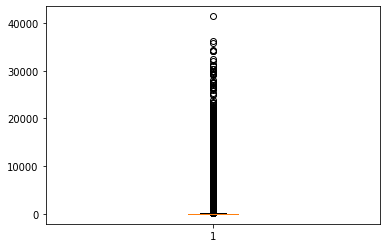

In [23]:
IQR_outliers_df = main_df

Q1 = IQR_outliers_df['ride_duration'].quantile(0.25)
Q3 = IQR_outliers_df['ride_duration'].quantile(0.75)

IQR = Q3 - Q1

IQR_outliers_df = IQR_outliers_df[((IQR_outliers_df['ride_duration'] < (Q1 - 1.5 * IQR)) | (IQR_outliers_df['ride_duration'] > (Q3 + 1.5 * IQR)))]


stat = mpl.cbook.boxplot_stats(IQR_outliers_df['ride_duration'])
#print(stat)

plt.boxplot(IQR_outliers_df['ride_duration'])

In [24]:
IQR_outliers_df

,started_at,ended_at,member_casual,started_at_sec,ended_at_sec,ride_duration
34,2022-07-26 13:39:23,2022-07-26 14:27:00,casual,1.658843e+09,1.658846e+09,47.616667
52,2022-06-27 20:53:48,2022-06-27 21:44:42,casual,1.656363e+09,1.656366e+09,50.900000
59,2022-05-14 22:11:43,2022-05-14 22:51:28,member,1.652566e+09,1.652569e+09,39.750000
69,2022-08-05 10:45:33,2022-08-05 11:31:14,casual,1.659696e+09,1.659699e+09,45.683333
83,2022-09-17 16:38:24,2022-09-17 18:00:55,casual,1.663433e+09,1.663438e+09,82.516667
...,...,...,...,...,...,...
5667561,2022-05-15 05:33:18,2022-05-15 06:45:22,casual,1.652593e+09,1.652597e+09,72.066667
5667571,2022-07-26 15:59:02,2022-07-26 17:04:19,casual,1.658851e+09,1.658855e+09,65.283333
5667583,2022-06-22 20:36:18,2022-06-22 21:28:17,casual,1.655930e+09,1.655933e+09,51.983333
5667584,2022-04-24 09:13:04,2022-04-24 09:58:09,casual,1.650792e+09,1.650794e+09,45.083333


In [34]:
month_info_outliers = pd.DataFrame(columns = ['month', 'total_rides', 'casuals_rides', 'members_rides'])
month_info_outliers = month_info_outliers.astype({"month": 'str', "total_rides": 'int', "casuals_rides": 'int', "members_rides": 'int'})

# Rides per month
for i in range(12):
  month_info_outliers.loc[i] = [
    calendar.month_name[i+1],
    len(IQR_outliers_df.loc[IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1]]),
    len(IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_outliers_df['member_casual'] == 'casual')]),
    len(IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_outliers_df['member_casual'] == 'member')])
  ]

In [27]:
month_info_outliers

,month,total_rides,casuals_rides,members_rides
0,January,3270,1245,2025
1,February,4311,1990,2321
2,March,19572,13924,5648
3,April,25094,18399,6695
4,May,62586,48335,14251
5,June,69616,53664,15952
6,July,76875,60123,16752
7,August,61844,46272,15572
8,September,46833,33004,13202
9,October,30612,20927,9263


In [28]:
month_info_duration_outliers = pd.DataFrame(
  columns = ['month', 'total_rides_duration_mean', 'casuals_rides_duration_mean', 'members_rides_duration_mean', 
             'total_rides_duration_std', 'casuals_rides_duration_std', 'members_rides_duration_std', 
             'total_rides_duration_mode', 'casuals_rides_duration_mode', 'members_rides_duration_mode',
             'total_rides_duration_median', 'casuals_rides_duration_median', 'members_rides_duration_median'])

# Converting column's data types to float and month column to string
month_info_duration_outliers = month_info_duration_outliers.astype('float')
month_info_duration_outliers = month_info_duration_outliers.astype({"month": 'str'})


## Rides mean, standard deviation, mode and median
for i in range(12):
  month_info_duration_outliers.loc[i] = [
    calendar.month_name[i+1],

    IQR_outliers_df.loc[IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1], 'ride_duration'].mean(),
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_outliers_df['member_casual'] == 'casual'), 'ride_duration'].mean(),
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_outliers_df['member_casual'] == 'member'), 'ride_duration'].mean(),

    IQR_outliers_df.loc[IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1], 'ride_duration'].std(),
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_outliers_df['member_casual'] == 'casual'), 'ride_duration'].std(),
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_outliers_df['member_casual'] == 'member'), 'ride_duration'].std(),

    IQR_outliers_df.loc[IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1], 'ride_duration'].mode()[0],
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_outliers_df['member_casual'] == 'casual'), 'ride_duration'].mode()[0],
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_outliers_df['member_casual'] == 'member'), 'ride_duration'].mode()[0],

    IQR_outliers_df.loc[IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1], 'ride_duration'].median(),
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_outliers_df['member_casual'] == 'casual'), 'ride_duration'].median(),
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.month_name() == calendar.month_name[i+1]) & (IQR_outliers_df['member_casual'] == 'member'), 'ride_duration'].median()
  ]

In [29]:
month_info_duration_outliers

,month,total_rides_duration_mean,casuals_rides_duration_mean,members_rides_duration_mean,total_rides_duration_std,casuals_rides_duration_std,members_rides_duration_std,total_rides_duration_mode,casuals_rides_duration_mode,members_rides_duration_mode,total_rides_duration_median,casuals_rides_duration_median,members_rides_duration_median
0,January,183.666014,290.453253,118.011638,988.616885,1569.091267,232.370149,1499.883333,1499.883333,38.916667,50.333333,65.316667,46.133333
1,February,125.512101,168.727270,88.459888,408.492511,563.834123,185.659752,1499.916667,1499.916667,38.133333,50.016667,62.700000,44.783333
2,March,117.064199,133.978287,75.365941,549.492220,644.001957,146.436747,37.800000,1499.916667,37.800000,53.183333,58.100000,44.966667
3,April,107.299756,121.612324,67.966380,469.664625,542.674064,123.976154,1499.900000,1499.900000,37.683333,53.133333,58.066667,44.500000
4,May,99.383732,109.604541,64.717900,424.970678,478.557012,121.794231,1499.916667,1499.916667,37.733333,54.366667,59.116667,44.716667
5,June,121.944242,137.749209,68.774876,707.285370,801.728169,130.996629,1499.916667,1499.916667,38.066667,54.125000,58.350000,45.050000
6,July,106.371153,118.038957,64.495354,560.529703,630.463635,114.131090,1499.900000,1499.900000,37.650000,54.466667,58.516667,45.116667
7,August,120.050972,137.476837,68.270234,677.700275,779.164667,128.295145,1499.916667,1499.916667,38.000000,53.600000,58.083333,45.066667
8,September,126.878822,78.194088,64.451651,723.193816,86.877815,81.888770,1499.900000,38.100000,38.216667,53.183333,57.350000,45.200000
9,October,132.868897,77.461283,68.612937,886.279908,88.687052,94.096289,1499.900000,38.250000,37.700000,52.858333,56.800000,45.700000


In [ ]:
data = pd.merge(month_info_outliers, month_info_duration_outliers, how = 'inner', on = 'month')

data


try:
    data.to_csv('/content/case_study/2022_bicycle_month_info_outliers.csv', mode = 'x', index = False, float_format = '%.6f')
except FileExistsError:
    print('Error. File already exists')

# Week outliers central tendencies

In [35]:
week_info_outliers = pd.DataFrame(columns = ['day', 'total_rides', 'casuals_rides', 'members_rides'])
week_info_outliers = week_info_outliers.astype({"day": 'str', "total_rides": 'int', "casuals_rides": 'int', "members_rides": 'int'})

# Rides per week's day 
for i in range(7):
  week_info_outliers.loc[i] = [
    calendar.day_name[i],
    len(IQR_outliers_df.loc[IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i]]),
    len(IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_outliers_df['member_casual'] == 'casual')]),
    len(IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_outliers_df['member_casual'] == 'member')])
  ]

In [31]:
week_info_outliers

,day,total_rides,casuals_rides,members_rides
0,Monday,53755,39340,14279
1,Tuesday,41799,28140,13532
2,Wednesday,41180,27091,13946
3,Thursday,47339,32372,14790
4,Friday,52992,38572,14195
5,Saturday,96855,76392,20164
6,Sunday,83127,64723,18124


In [32]:
week_info_duration_outliers = pd.DataFrame(
  columns = ['day', 'total_rides_duration_mean', 'casuals_rides_duration_mean', 'members_rides_duration_mean', 
             'total_rides_duration_std', 'casuals_rides_duration_std', 'members_rides_duration_std', 
             'total_rides_duration_mode', 'casuals_rides_duration_mode', 'members_rides_duration_mode',
             'total_rides_duration_median', 'casuals_rides_duration_median', 'members_rides_duration_median'])

# Converting column's data types to float and month column to string
week_info_duration_outliers = week_info_duration_outliers.astype('float')
week_info_duration_outliers = week_info_duration_outliers.astype({"day": 'str'})


## Rides mean, standard deviation, mode and median
for i in range(7):
  week_info_duration_outliers.loc[i] = [
    calendar.day_name[i],

    IQR_outliers_df.loc[IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i], 'ride_duration'].mean(),
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_outliers_df['member_casual'] == 'casual'), 'ride_duration'].mean(),
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_outliers_df['member_casual'] == 'member'), 'ride_duration'].mean(),

    IQR_outliers_df.loc[IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i], 'ride_duration'].std(),
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_outliers_df['member_casual'] == 'casual'), 'ride_duration'].std(),
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_outliers_df['member_casual'] == 'member'), 'ride_duration'].std(),

    IQR_outliers_df.loc[IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i], 'ride_duration'].mode()[0],
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_outliers_df['member_casual'] == 'casual'), 'ride_duration'].mode()[0],
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_outliers_df['member_casual'] == 'member'), 'ride_duration'].mode()[0],

    IQR_outliers_df.loc[IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i], 'ride_duration'].median(),
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_outliers_df['member_casual'] == 'casual'), 'ride_duration'].median(),
    IQR_outliers_df.loc[(IQR_outliers_df['started_at'].dt.day_name() == calendar.day_name[i]) & (IQR_outliers_df['member_casual'] == 'member'), 'ride_duration'].median()
  ]

In [33]:
week_info_duration_outliers

,day,total_rides_duration_mean,casuals_rides_duration_mean,members_rides_duration_mean,total_rides_duration_std,casuals_rides_duration_std,members_rides_duration_std,total_rides_duration_mode,casuals_rides_duration_mode,members_rides_duration_mode,total_rides_duration_median,casuals_rides_duration_median,members_rides_duration_median
0,Monday,112.053045,115.306503,69.553293,568.584137,576.316813,124.721121,1499.900000,1499.900000,37.516667,53.833333,58.733333,44.983333
1,Tuesday,118.295909,126.486337,74.265559,609.734501,667.333515,144.196086,1499.916667,1499.916667,40.083333,52.683333,58.825000,44.550000
2,Wednesday,115.139180,122.970365,68.928946,601.807592,641.662800,125.590121,1499.916667,1499.916667,37.583333,51.550000,57.333333,44.550000
3,Thursday,116.605545,121.820601,70.737875,598.657536,643.641105,127.695795,1499.916667,1499.916667,38.200000,52.450000,57.750000,44.783333
4,Friday,124.234417,122.041381,70.253817,683.983716,640.064409,123.397309,1499.916667,1499.916667,38.216667,52.641667,56.950000,45.133333
5,Saturday,115.141400,109.680076,66.005210,684.723806,577.710283,109.532071,1499.900000,1499.900000,37.883333,54.550000,57.916667,45.633333
6,Sunday,118.650115,114.722944,66.391838,658.706008,578.827927,108.182210,1499.916667,1499.916667,39.150000,55.266667,59.100000,45.875000


In [ ]:
data = pd.merge(week_info_outliers, week_info_duration_outliers, how = 'inner', on = 'day')

data


try:
    data.to_csv('/content/case_study/2022_bicycle_week_info_outliers.csv', mode = 'x', index = False, float_format = '%.6f')
except FileExistsError:
    print('Error. File already exists')

# Charts - The difference between casuals and members.

<b><h2> Charts' notes </h2></b>

<li> A chart with the total rides per month and how many rides casuals and members have taken. </li>
<br>
<li> A chart with the total rides per week's day and how many rides casuals and members have taken. </li>
<hr>
<li> A chart with the casuals, members and totals average ride duration per month. </li>
<br>
<li> A chart with the casuals, members and totals average ride duration per week's day. </li>

In [36]:
month_df = pd.read_csv('/content/case_study/2022_bicycle_month_info.csv')
week_df = pd.read_csv('/content/case_study/2022_bicycle_week_info.csv')

month_df

,month,total_rides,casuals_rides,members_rides,total_rides_duration_mean,casuals_rides_duration_mean,members_rides_duration_mean,total_rides_duration_std,casuals_rides_duration_std,members_rides_duration_std,total_rides_duration_mode,casuals_rides_duration_mode,members_rides_duration_mode,total_rides_duration_median,casuals_rides_duration_median,members_rides_duration_median
0,January,100500,17275,83225,9.785336,11.633932,9.401624,7.140822,7.825947,6.928711,4.383333,0.166667,4.333333,7.650000,9.416667,7.333333
1,February,111298,19426,91872,9.930336,12.160039,9.458874,7.348845,8.108175,7.088792,0.033333,0.033333,0.033333,7.750000,9.933333,7.350000
2,March,264468,75956,188512,11.202945,14.043105,10.058576,8.148241,8.929881,7.513709,4.316667,7.150000,4.316667,8.783333,11.900000,7.800000
3,April,346155,108018,238137,11.135269,13.848208,9.904691,8.128009,8.830080,7.470715,0.033333,0.033333,4.300000,8.783333,11.750000,7.666667
4,May,572271,232079,340192,12.536014,14.471654,11.215520,8.546869,8.909268,8.027068,5.166667,9.583333,4.383333,10.366667,12.616667,9.000000
5,June,699576,315380,384196,12.805867,14.122630,11.724959,8.420100,8.678023,8.042793,7.133333,8.416667,5.383333,10.800000,12.316667,9.633333
6,July,746597,345923,400674,12.641082,13.851932,11.595692,8.431937,8.710901,8.038055,5.983333,7.900000,5.400000,10.583333,11.950000,9.516667
7,August,724073,312645,411428,12.168410,13.301868,11.307094,8.211354,8.536173,7.846946,6.633333,8.066667,6.633333,10.116667,11.316667,9.250000
8,September,654497,263159,391338,11.629587,12.752000,10.874810,8.018052,8.351023,7.694627,4.333333,7.633333,4.716667,9.550000,10.716667,8.800000
9,October,528069,187739,340330,10.659957,11.892847,9.979848,7.696731,8.181903,7.327282,4.433333,6.033333,3.900000,8.500000,9.700000,7.883333


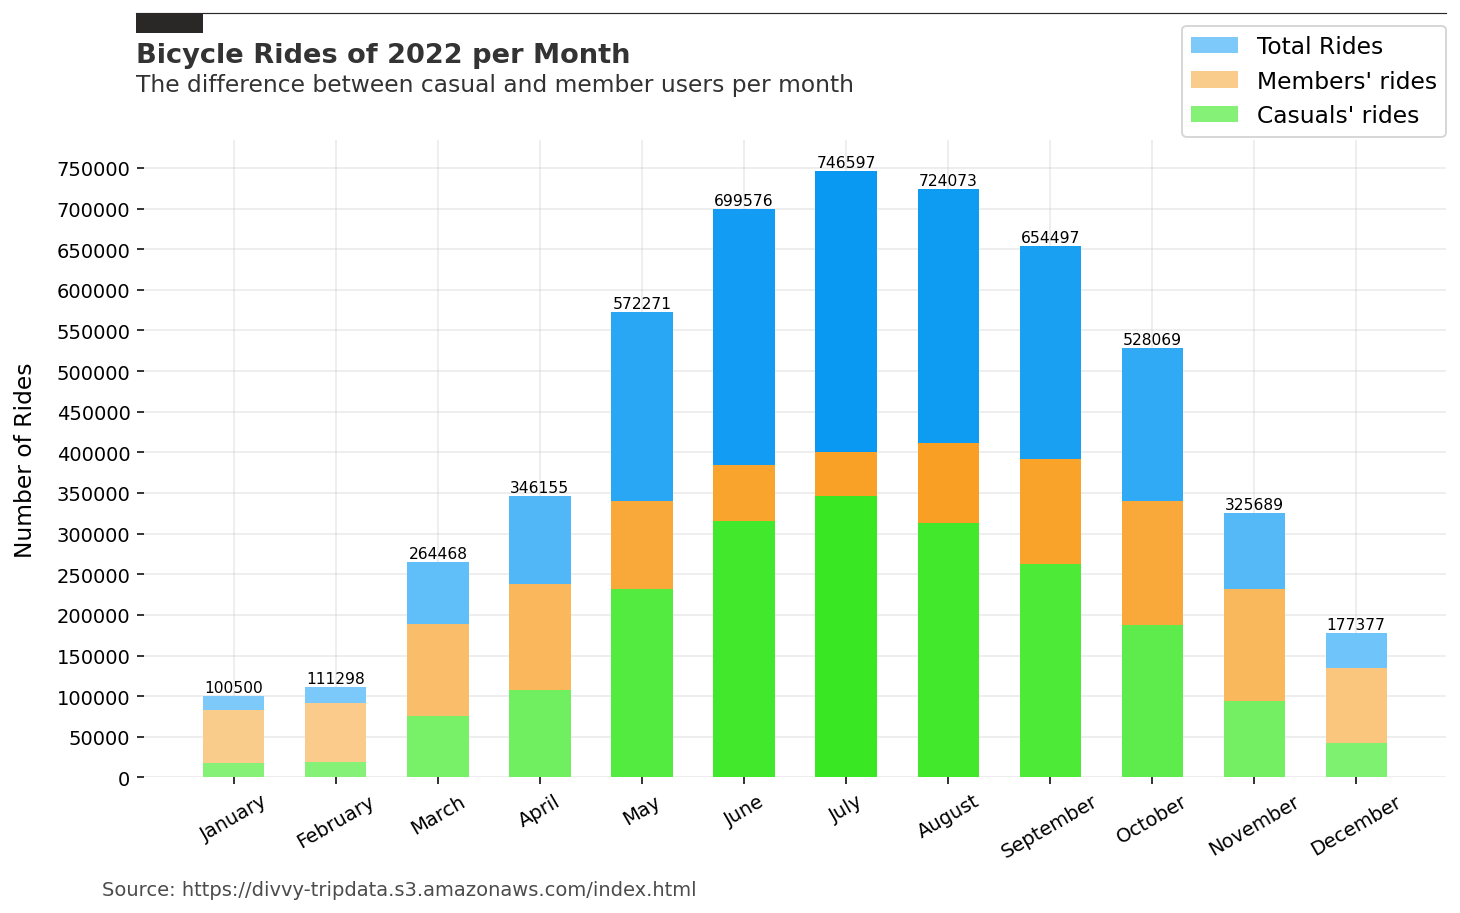

In [37]:
## Setting axis
x = month_df['month']

y_total = month_df['total_rides']

y_members = month_df['members_rides']

y_casuals = month_df['casuals_rides']




fig, ax = plt.subplots(figsize = (12, 7), dpi = 140)

# Intervals of colors
total_colours = ["#7dcafa", "#0a99f2"]
members_colours = ["#facc8c", "#f9a024"]
casuals_colours = ["#85f277", "#3ae723"]

# Building the colormap
cmap_total = mpl.colors.LinearSegmentedColormap.from_list("colour_map", total_colours, N = 256)
norm_total = mpl.colors.Normalize(y_total.min(), y_total.max())

cmap_members = mpl.colors.LinearSegmentedColormap.from_list("colour_map", members_colours, N = 256)
norm_members = mpl.colors.Normalize(y_members.min(), y_members.max())

cmap_casuals = mpl.colors.LinearSegmentedColormap.from_list("colour_map", casuals_colours, N = 256)
norm_casuals = mpl.colors.Normalize(y_casuals.min(), y_casuals.max())

# Plot bars
bar1 = ax.bar(x, y_total, width = 0.6, color = cmap_total(norm_total(y_total)), zorder = 2, label = 'Total Rides')
bar2 = ax.bar(x, y_members, width = 0.6, color = cmap_members(norm_members(y_members)), zorder = 3, label = "Members' rides")
bar3 = ax.bar(x, y_casuals, width = 0.6, color = cmap_casuals(norm_casuals(y_casuals)), zorder = 4, label = "Casuals' rides")

# Adding grids
ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

# Adding y title
ax.set_ylabel('Number of Rides', fontsize = 12, labelpad = 10)

# Adding title and subtitle
ax.text(x = 0.12, y = 0.93, s = "Bicycle Rides of 2022 per Month", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.90, s = "The difference between casual and member users per month", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

# Adding source
ax.text(x = 0.1, y = 0.08, s = "Source: https://divvy-tripdata.s3.amazonaws.com/index.html", transform = fig.transFigure, ha = 'left', fontsize = 10, alpha = 0.7)

# Adding columns' numbers
adjust = 5000
for i in range(len(month_df)):
  height = month_df['total_rides'][i]
  month = month_df['month'][i]
  
  ax.annotate(f'{height}', xy = (month, height + adjust), ha = 'center', size = 8)

# Adding line and rectangle
ax.plot([0.12, .9], [.98, .98], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

# Adjust the margins around the plot area
plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.85, wspace = None, hspace = None)

# Set a white background
fig.patch.set_facecolor('white')

#
plt.xticks(rotation = 30)
ax.yaxis.set_major_locator(mticker.MaxNLocator(16))
ax.set_frame_on(False)
ax.legend(loc = "best", ncol = 1, bbox_to_anchor = [1, 1.18], borderaxespad = 0, frameon = True, fontsize = 12)

#plt.savefig('/content/case_study/rides_month_info.png')

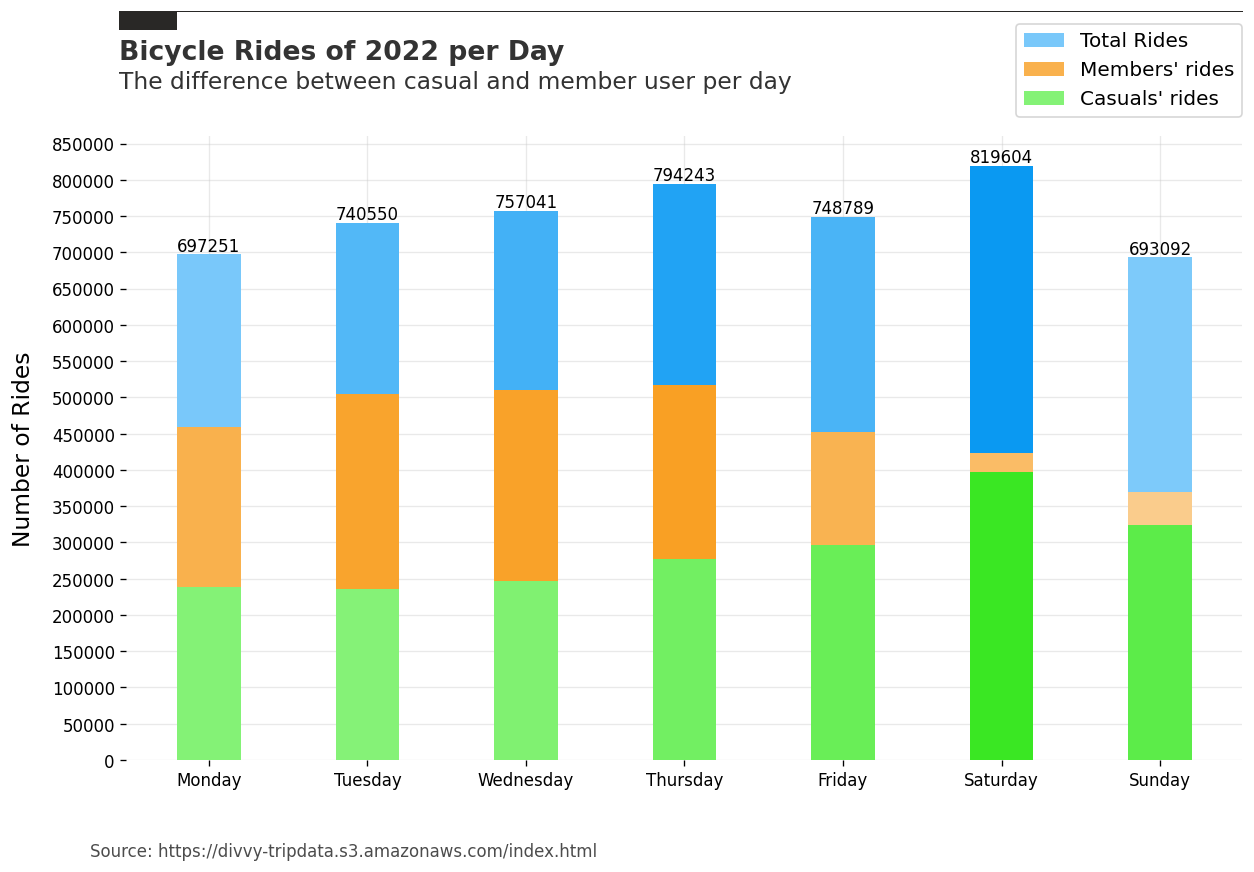

In [42]:
## Setting axis
x = week_df['day']

y_total = week_df['total_rides']

y_members = week_df['members_rides']

y_casuals = week_df['casuals_rides']




fig, ax = plt.subplots(figsize = (12, 8), dpi = 120)

# Intervals of colors
total_colours = ["#7dcafa", "#0a99f2"]
members_colours = ["#facc8c", "#f9a024"]
casuals_colours = ["#85f277", "#3ae723"]

# Building the colormap
cmap_total = mpl.colors.LinearSegmentedColormap.from_list("colour_map", total_colours, N = 256)
norm_total = mpl.colors.Normalize(y_total.min(), y_total.max())

cmap_members = mpl.colors.LinearSegmentedColormap.from_list("colour_map", members_colours, N = 256)
norm_members = mpl.colors.Normalize(y_members.min(), y_members.max())

cmap_casuals = mpl.colors.LinearSegmentedColormap.from_list("colour_map", casuals_colours, N = 256)
norm_casuals = mpl.colors.Normalize(y_casuals.min(), y_casuals.max())

# Plot bars
bar1 = ax.bar(x, y_total, width = 0.4, color = cmap_total(norm_total(y_total)), zorder = 2, label = 'Total Rides')
bar2 = ax.bar(x, y_members, width = 0.4, color = cmap_members(norm_members(y_members)), zorder = 3, label = "Members' rides")
bar3 = ax.bar(x, y_casuals, width = 0.4, color = cmap_casuals(norm_casuals(y_casuals)), zorder = 4, label = "Casuals' rides")

# Adding grids
ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

# Adding y title
ax.set_ylabel('Number of Rides', fontsize = 14, labelpad = 10)

# Adding title and subtitle
ax.text(x = 0.12, y = 0.93, s = "Bicycle Rides of 2022 per Day", transform = fig.transFigure, ha = 'left', fontsize = 16, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.90, s = "The difference between casual and member user per day", transform = fig.transFigure, ha = 'left', fontsize = 14, alpha = 0.8)

# Adding source
ax.text(x = 0.1, y = 0.1, s = "Source: https://divvy-tripdata.s3.amazonaws.com/index.html", transform = fig.transFigure, ha = 'left', fontsize = 10, alpha = 0.7)

# Adding columns' numbers
adjust = 5000
for i in range(len(week_df)):
  height = week_df['total_rides'][i]
  day = week_df['day'][i]
  
  ax.annotate(f'{height}', xy = (day, height + adjust), ha = 'center', size = 10)

# Adding line and rectangle
ax.plot([0.12, 0.9], [0.98, 0.98], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.98), 0.04, -0.02, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

# Adjust the margins around the plot area
plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.85, wspace = None, hspace = None)

# Set a white background
fig.patch.set_facecolor('white')

# Setting tick's number, removing graph frame and adding legend
ax.yaxis.set_major_locator(mticker.MaxNLocator(18))
ax.set_frame_on(False)
ax.legend(loc = "best", ncol = 1, bbox_to_anchor = [1, 1.18], borderaxespad = 0, frameon = True, fontsize = 12)

#plt.savefig('/content/case_study/rides_week_info.png')

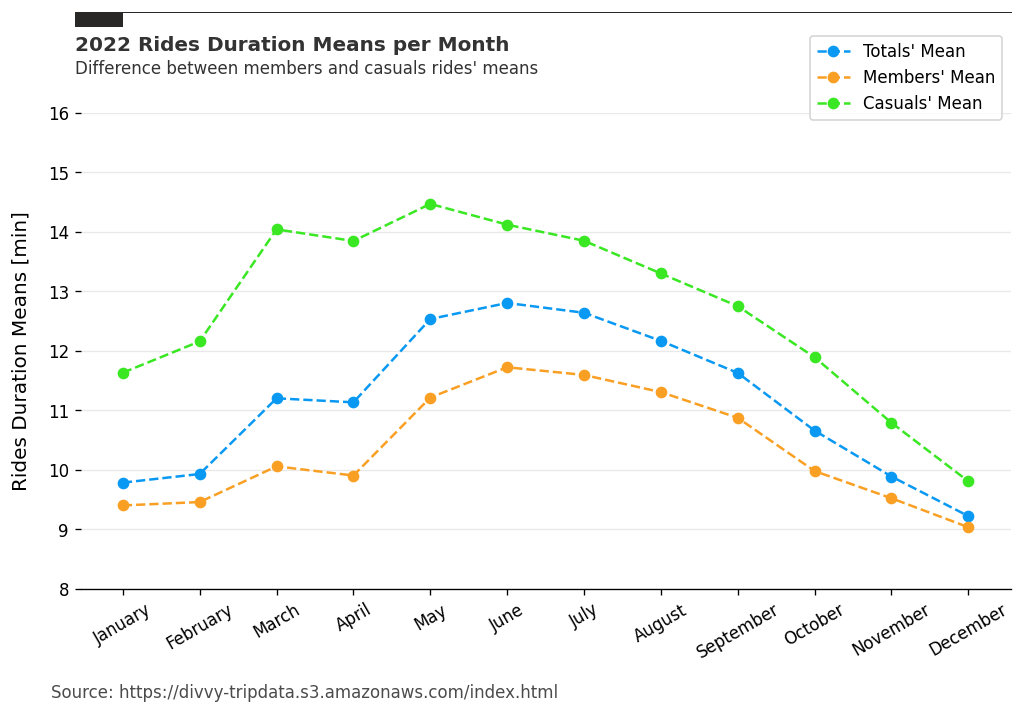

In [43]:
x = month_df['month']

y_total = month_df['total_rides_duration_mean']
y_members = month_df['members_rides_duration_mean']
y_casuals = month_df['casuals_rides_duration_mean']


fig, ax = plt.subplots(figsize = (10, 6.5), dpi = 120)

# Plotting lines
ax.plot(x, y_total, '--o', color = '#0a99f2', label = "Totals' Mean")
ax.plot(x, y_members, '--o', color = '#f9a024', label = "Members' Mean")
ax.plot(x, y_casuals, '--o', color = '#3ae723', label = "Casuals' Mean")

# Setting labels
ax.set_ylabel('Rides Duration Means [min]', fontsize = 12, labelpad = 10)

# Drawing the rectangle and black top line
ax.plot([0.12, 0.9], [0.98, 0.98], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.98), 0.04, -0.02, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

# Title, subtitle and source
ax.text(x = 0.12, y = 0.93, s = '2022 Rides Duration Means per Month', transform = fig.transFigure, ha = 'left', fontsize = 12, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.90, s = "Difference between members and casuals rides' means", transform = fig.transFigure, ha = 'left', fontsize = 10, alpha = 0.8)
ax.text(x = 0.1, y = 0.1, s = "Source: https://divvy-tripdata.s3.amazonaws.com/index.html", transform = fig.transFigure, ha = 'left', fontsize = 10, alpha = 0.7)

# Horizontal grid
ax.grid(which = 'major', axis = 'y', alpha = 0.4, color = '#c9c9c9', zorder = 0)

# adjust margins
plt.subplots_adjust(left = None, right = None, bottom = 0.24, top = 0.85)

ax.legend(loc = 'best', bbox_to_anchor = [1, 1.18])

# rotating x ticks and setting y ones.
plt.xticks(rotation = 30)
plt.yticks(np.arange(8, 17, 1))

# Remove graph frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#plt.savefig('/content/case_study/ride_duration_month_info.png')

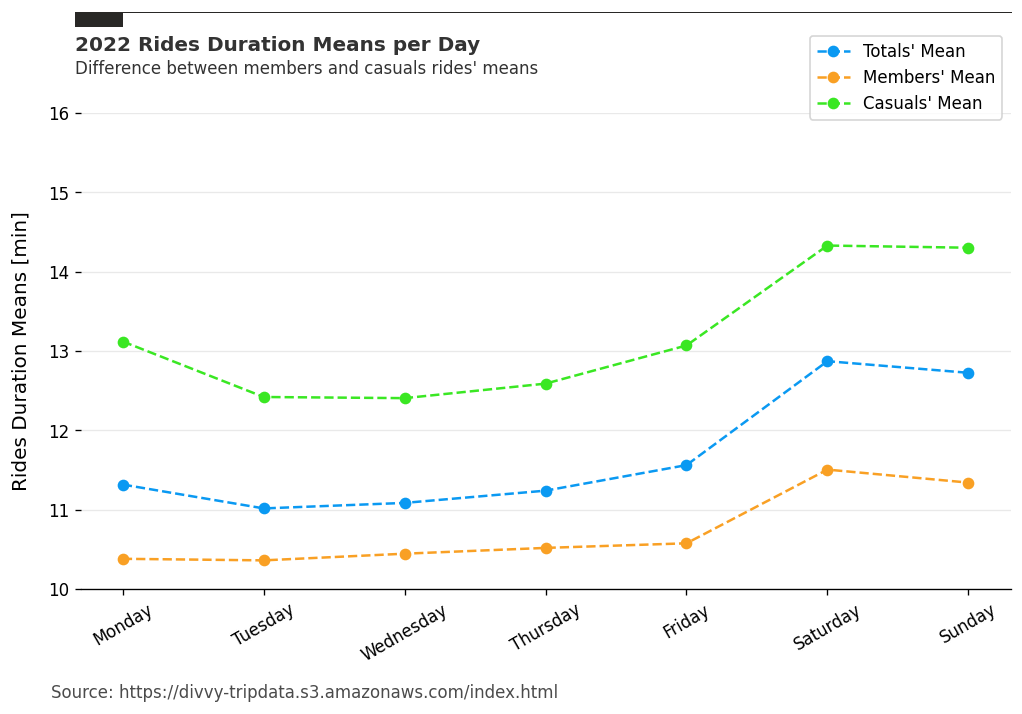

In [44]:
x = week_df['day']

y_total = week_df['total_rides_duration_mean']
y_members = week_df['members_rides_duration_mean']
y_casuals = week_df['casuals_rides_duration_mean']


fig, ax = plt.subplots(figsize = (10, 6.5), dpi = 120)

# Plotting lines
ax.plot(x, y_total, '--o', color = '#0a99f2', label = "Totals' Mean")
ax.plot(x, y_members, '--o', color = '#f9a024', label = "Members' Mean")
ax.plot(x, y_casuals, '--o', color = '#3ae723', label = "Casuals' Mean")

# Setting labels
ax.set_ylabel('Rides Duration Means [min]', fontsize = 12, labelpad = 10)

# Drawing the rectangle and black top line
ax.plot([0.12, 0.9], [0.98, 0.98], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.98), 0.04, -0.02, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

# Title, subtitle and source
ax.text(x = 0.12, y = 0.93, s = '2022 Rides Duration Means per Day', transform = fig.transFigure, ha = 'left', fontsize = 12, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.90, s = "Difference between members and casuals rides' means", transform = fig.transFigure, ha = 'left', fontsize = 10, alpha = 0.8)
ax.text(x = 0.1, y = 0.1, s = "Source: https://divvy-tripdata.s3.amazonaws.com/index.html", transform = fig.transFigure, ha = 'left', fontsize = 10, alpha = 0.7)

# Horizontal grid
ax.grid(which = 'major', axis = 'y', alpha = 0.4, color = '#c9c9c9', zorder = 0)

# adjust margins
plt.subplots_adjust(left = None, right = None, bottom = 0.24, top = 0.85)

ax.legend(loc = 'best', bbox_to_anchor = [1, 1.18])

# rotating x ticks and setting y ones.
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(np.arange(10, 17, 1), fontsize = 10)



# Remove part of graph frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#plt.savefig('/content/case_study/ride_duration_week_info.png')